In [ ]:
## ***Uncertainty Quantification***

Exercise 0 

Prof. Dr. Martin Frank
#### **EXERCISE SHEET 0**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.special

&nbsp;

**EXERCISE 1)**

Let $X_1,\dots,X_n$ be iid random variables with $E(X_i)=\mu$. Show that

$$
\bar X = \frac{1}{n}\sum_{i=1}^n X_i \text{ satisfies } E(\bar X) = \mu.
$$



&nbsp;

**EXERCISE 2)**

A random vector $X=(X_1,\dots,X_n)^T$ is said to be normally distributed
if the probability density function is given by 

$$
\begin{aligned}
f_{X}(x) = \frac{1}{(2\pi)^{n/2}\vert \det{V}\vert^{1/2}}\text{exp}\left( -\frac{1}{2}(x-\mu)^T V^{-1}(x-\mu) \right)
\end{aligned}
$$
where $\mu = (\mu_1,\cdots,\mu_n)$ is the mean and 

$$
\begin{aligned}
V = 
\begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_n) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & & \vdots \\
\vdots &  & \ddots & \\
& & & & \\
\text{cov}(X_n,X_1) & \cdots &  & \text{var}(X_n)
\end{pmatrix}\end{aligned}
$$ 

is the covariance matrix. The notation is
$X \sim \mathcal{N}(\mu,V)$. Let $Y=(Y_1,\dots,Y_n)^T$ be a normally
distributed random vector with distribution $\mathcal{N}(\mu,V)$, where
$V$ is positive definite and has the Cholesky decomposition $V=LL^T$.
Let $Z\sim \mathcal{N}(0,I_n)$, where $I_n$ is the $n\times n$ identity
matrix. Show that $Y$ can be written as 

$$
Y= LZ+\mu.
$$

&nbsp;

**EXERCISE 3)**

Let $X\sim \mathcal{N}(\mu,\sigma^2)$ be a normally distributed random
variable. Look up inverse transform sampling, rejection sampling and the
Box-Muller method in the literature and


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)  Derive a formula for inverse transform sampling of $X$ using the
    error function
 
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $$\text{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}dt.$$


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)   Derive a rejection algorithm to sample $X$ by using $e^{-|x|}$ to
    generate an upper bound.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(c)   Write down an algorithm for the Box-Muller method.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(d) Add your previous derivations to the code below to obtain inverse transform sampling, rejection sampling, and the  Box-Muller method. 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Run the code and compare their efficiency (also with `randn`).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(e)   How would you sample from a multi-variate Gaussian random vector

   $$ X\sim \mathcal{N}(\mu,V)?$$



In [3]:
# exact pdf
def f(x,mu,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-0.5*((x-mu)**2)/(sigma**2));

# inverse cdf for density function exp(-|x|)
def GInverse(U1):
    
    # TODO: define inverse cdf for density function exp(-|x|)
    # ...
    
    return y

# sample function of acceptReject
def sampleNormal():
    
    # TODO: define sample function of acceptReject
    # ...
    
    # if sample is accepted return reject = 1, otherwise reject = 2. Store result of sample on eta
    return [reject,eta];

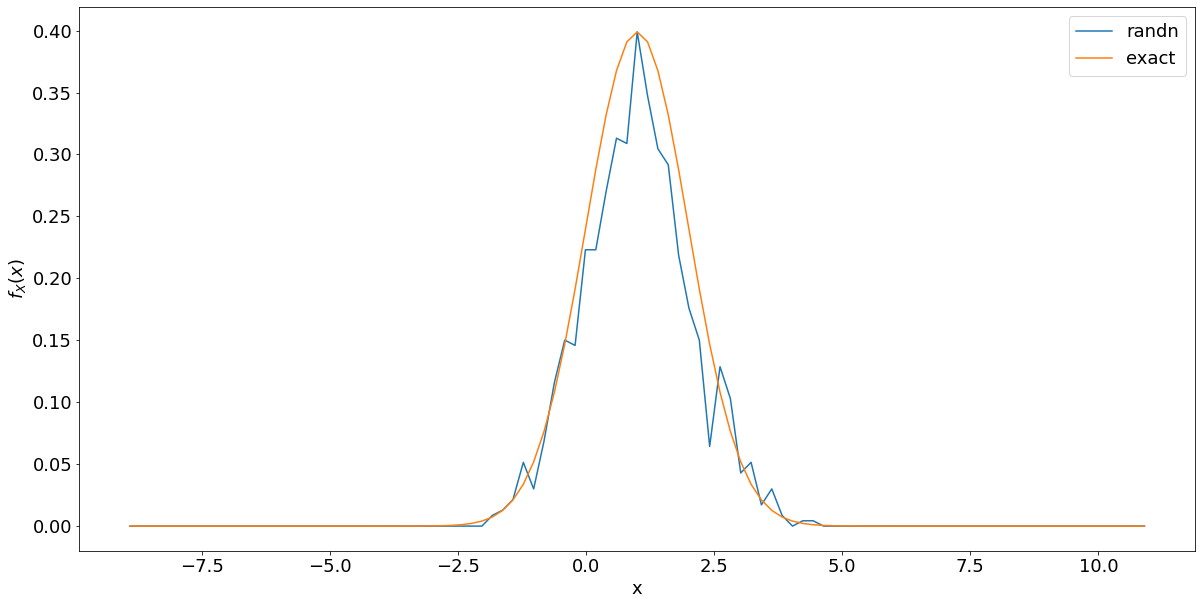

In [4]:
# the idea of this code is to approximate the pdf of a given normal distribution by generating samples and plotting a histogram. 
# I.e. we generate samples with a specified sampling strategy and count how many samples fall into a certain interval

method = "randn"; # pick sampling strategy from acceptReject, randn, inverseSampling, boxmuller

# define mean and variance
mu = 1.0;
sigma = 1.0;

# define grid for x (we will count the samples on this grid)
NGrid = 100;
width = 10;
grid = np.linspace(mu-width,mu+width,NGrid);
dx = grid[2]-grid[1];
gridMidpoints = np.linspace(mu-width+0.5*dx,mu+width-0.5*dx,NGrid-1);

# define hits. Hits saves how many samples fall into the interval (grid[l],grid[l+1]], i.e. we save a histogram
hits = np.zeros((NGrid-1,1));
success = 0;

# define number of samples to compute histogram
NSamples = 1000;

# main loop: Compute k-th sample with specified method and check in which part of the grid this sample will lie
for k in range(1,NSamples):
    reject = 1; # every sample is accepted if not otherwise defined. 1 is accepted, 2 is rejected
    
    # compute sample with mean 0, variance 1
    if method == "acceptReject":
        [reject,sample] = sampleNormal(); 
    elif method == "randn":
        sample = np.random.randn();
    elif method == "inverseSampling":
        U = np.random.rand();
        # TODO: define inverse sampling 
        # Note: several special functions such as the inverse error function are implemented in scipy.special
        # sample = ...
#    elif method == "boxmuller":
        # TODO: define boxmuller sampling
        # sample = ...
    
    # scale sample to defined mean and variance
    sample = mu+sigma*sample;
    
    # save in hits: check in which part of the grid this sample will lie
    if reject == 1:
        success = success+1; # for acceptReject
        for l in range(1,NGrid-1):
            if sample > grid[l] and sample <= grid[l+1]:
                hits[l] = hits[l]+1;
                break;

if method == "acceptReject":
    print('efficiency is',success/NSamples)

# plotting
maxHits = max(hits); # rescale to exact pdf. One could also rescale such that histogram integrates to 1.

plt.figure(figsize=(20,10))
fig, ax = plt.plot(gridMidpoints,f(mu,mu,sigma)*hits/maxHits,gridMidpoints,f(gridMidpoints,mu,sigma))

plt.xlabel('x', fontsize=18);
plt.ylabel(r'$f_X(x)$', fontsize=18);
plt.legend([method,'exact'], fontsize=18);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

&nbsp;

**EXERCISE 4)**

Let $X$ be a uniformly distributed random variable on the interval
$[a,b]$, i.e. $X$ has the pdf 

$$
f_X(x) = \frac{1}{b-a}\chi_{[a,b]}(x).
$$

Show that

$$
\text{E}[X] = \frac{a+b}{2}\text{ and } \text{Var}[X] = \frac{(b-a)^2}{12}.
$$

&nbsp;
### **Additional Exercises**


**EXERCISE 5)**

Let $X$ be a $\text{Gamma}(\alpha,\beta)$-distributed random variable,
i.e. $X$ has the pdf

$$
f_X(x) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x} \text{ for } x>0.
$$

Show that

$$
E[X] = \frac{\alpha}{\beta}\text{ and } \text{Var}[X] = \frac{\alpha}{\beta^2}.
$$

**EXERCISE 6)**

Use the Cauchy-Schwarz inequality to show that the correlation

$$
\text{corr}(X_1,X_2) = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1}\sigma_{X_2}}
$$

of two continuous random variables satisfies

$$
-1\leq \text{corr}(X_1,X_2)\leq 1.
$$